# Preprocessing the DGE data
To preprocess your data, we recommend the following steps:
1. Calculate total UMIs/cell and filter cells with low total UMIs (`threshold_umi`)
2. Remove genes that are expressed in too few cells (`threshold_gene`)
3. Normalize the data using CPM (counts per million)

Optionally, you may wish to isolate the top `top_n_genes` genes for downstream analysis, but for now we will not do that — we will use all preprocessed genes in the bioRSP analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
threshold_umi = 500
threshold_gene = 1

# Optional
top_n_genes = 20

In [3]:
dge_matrix = pd.read_csv('data/MCA2.dge.txt', delimiter='\t', index_col=0)
print(f"num. genes: {dge_matrix.shape[0]}, num. cells: {dge_matrix.shape[1]}")

num. genes: 19493, num. cells: 10000


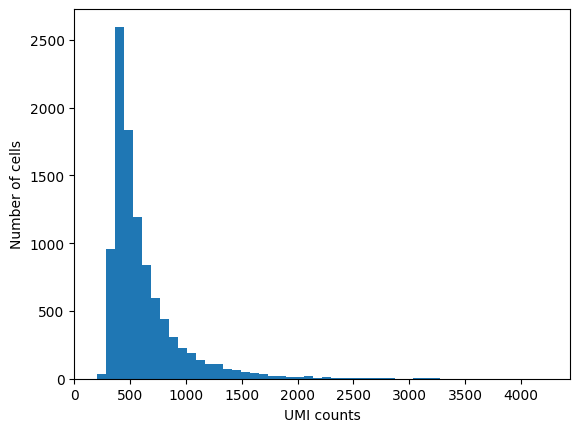

num. cells filtered out: 4945


In [4]:
umi_counts_per_cell = dge_matrix.sum(axis=0)

# Plot UMI counts distribution
plt.hist(umi_counts_per_cell, bins=50)
plt.xlabel('UMI counts')
plt.ylabel('Number of cells')
plt.show()

# Filter cells with low total UMI counts
filtered_cells = umi_counts_per_cell[umi_counts_per_cell > threshold_umi].index
dge_matrix_filtered = dge_matrix[filtered_cells]

print(f"num. cells filtered out: {dge_matrix.shape[1] - dge_matrix_filtered.shape[1]}")

In [5]:
# Filter genes expressed in fewer than a threshold number of cells
gene_counts_per_cell = (dge_matrix_filtered > 0).sum(axis=1)
filtered_genes = gene_counts_per_cell[gene_counts_per_cell > threshold_gene].index
dge_matrix_filtered = dge_matrix_filtered.loc[filtered_genes]

print(f"num. genes filtered out: {dge_matrix.shape[0] - dge_matrix_filtered.shape[0]}")

num. genes filtered out: 3362


In [6]:
dge_matrix_filtered.to_csv('data/MCA2_filtered.dge.txt', sep='\t')

In [7]:
# Optional: Calculate variance and select top highly variable genes
gene_variance = dge_matrix_filtered.var(axis=1)
hv_genes = gene_variance.nlargest(top_n_genes).index
hv_gene_matrix = dge_matrix_filtered.loc[hv_genes]

hv_genes = pd.DataFrame(hv_genes)
hv_genes.to_csv('data/MCA2.hv_genes.txt', sep='\t')
hv_gene_matrix.to_csv('data/MCA2_hv_gene_matrix.dge.txt', sep='\t')